In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [111]:
df = pd.read_csv('insurance.csv')

In [112]:
df.sample(5)

,age,sex,bmi,children,smoker,region,expenses
1268,20,female,33.3,0,no,southwest,1880.49
701,50,female,44.7,0,no,northeast,9541.70
841,59,male,24.7,0,no,northeast,12323.94
1128,34,male,32.8,1,no,southwest,14358.36
1051,64,male,26.4,0,no,northeast,14394.56


In [113]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

<Axes: xlabel='sex', ylabel='expenses'>

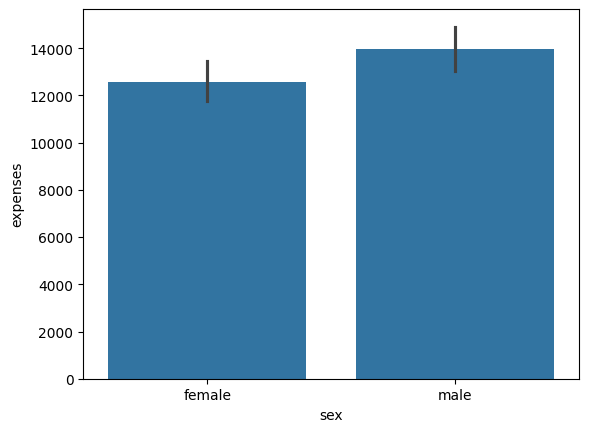

In [116]:
sns.barplot(data = df,x='sex',y='expenses')

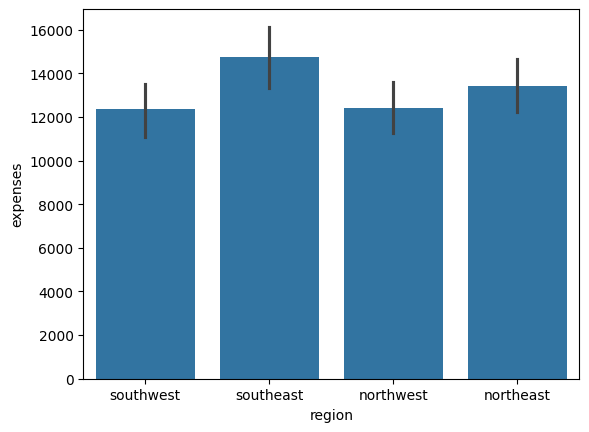

In [117]:
sns.barplot(data=df, x='region', y='expenses');

<Axes: xlabel='smoker', ylabel='count'>

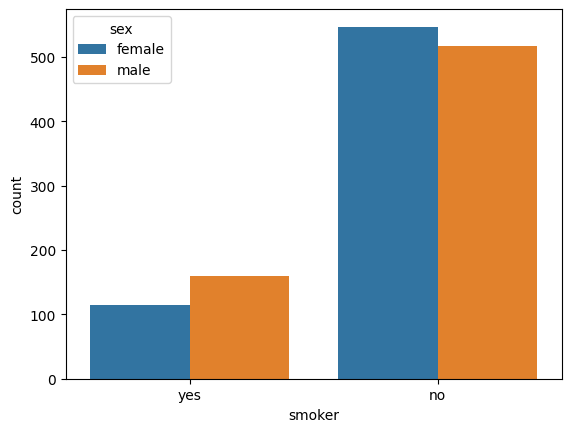

In [118]:
sns.countplot(x='smoker',hue ='sex',data=df)

In [71]:
# Feature 2: Age Group
def age_group(age):
    if age < 25:
        return "young"
    elif age < 45:
        return "adult"
    elif age < 60:
        return "middle_aged"
    return "senior"

In [72]:
df["age_group"] = df["age"].apply(age_group)

In [73]:
df.drop('age',axis = 1)

,sex,bmi,children,smoker,region,expenses,age_group
0,female,27.9,0,yes,southwest,16884.92,young
1,male,33.8,1,no,southeast,1725.55,young
2,male,33.0,3,no,southeast,4449.46,adult
3,male,22.7,0,no,northwest,21984.47,adult
4,male,28.9,0,no,northwest,3866.86,adult
...,...,...,...,...,...,...,...
1333,male,31.0,3,no,northwest,10600.55,middle_aged
1334,female,31.9,0,no,northeast,2205.98,young
1335,female,36.9,0,no,southeast,1629.83,young
1336,female,25.8,0,no,southwest,2007.95,young


In [119]:
X = df.drop('expenses', axis=1)  # all features except 'expenses'
y = df['expenses']  

In [120]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [121]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [122]:
categorical_features = ['sex', 'region', 'smoker']
numeric_features = ['bmi', 'children','age']

In [123]:
# Create column transformer for OHE
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

In [124]:
# Create a pipeline with preprocessing and random forest classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # ✅ use regressor here
])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['sex', 'region', 'smoker']),
                                                 ('num', 'passthrough',
                                                  ['bmi', 'children',
                                                   'age'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [126]:
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 21676603.27
Root Mean Squared Error (RMSE): 4655.81
Mean Absolute Error (MAE): 2601.20
R² Score: 0.8548


In [127]:
import pickle

# Save the trained pipeline using pickle
pickle_model_path = "model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)